# Recipe Dataset Analysis

Comprehensive exploratory data analysis of food.com recipe datasets

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Set plot styling
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

Loading all recipe datasets

In [ ]:
# Set data directory path
dataset_path = "data/"

# List of files to load with corresponding variable names
files = {
    "interactions_test_df": "interactions_test.csv",
    "interactions_train_df": "interactions_train.csv",
    "interactions_validation_df": "interactions_validation.csv",
    "recipes_df": "PP_recipes.csv",
    "users_df": "PP_users.csv",
    "raw_interactions_df": "RAW_interactions.csv",
    "raw_recipes_df": "RAW_recipes.csv"
}

# Dictionary to hold DataFrames
dfs = {}

# Load each CSV file into a named DataFrame variable
for var_name, file_name in files.items():
    try:
        file_path = dataset_path + file_name
        df = pd.read_csv(file_path, encoding='latin1', sep=',', on_bad_lines='skip', low_memory=False)
        
        # Assign df to both dictionary and variable dynamically
        globals()[var_name] = df
        dfs[var_name] = df
        
        print(f"Loaded {file_name} into variable '{var_name}', shape: {df.shape}")
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

Loaded interactions_test.csv into variable 'interactions_test_df', shape: (12455, 6)
Loaded interactions_train.csv into variable 'interactions_train_df', shape: (698901, 6)
Loaded interactions_validation.csv into variable 'interactions_validation_df', shape: (7023, 6)
Loaded PP_recipes.csv into variable 'recipes_df', shape: (178265, 8)
Loaded PP_users.csv into variable 'users_df', shape: (25076, 6)
Loaded RAW_interactions.csv into variable 'raw_interactions_df', shape: (1132367, 5)
Loaded RAW_recipes.csv into variable 'raw_recipes_df', shape: (231637, 12)


## 2. Dataset Overview

Understanding the schema and basic statistics of each dataset

In [ ]:
# Function to display dataset summary
def summarize_dataset(df_name, df):
    print(f"\n{'='*50}")
    print(f"Dataset: {df_name}")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print("\nColumn info:")
    for col in df.columns:
        print(f"- {col}: {df[col].dtype}")
    
    print("\nSample data:")
    display(df.head(3))
    
    print("\nMissing values:")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Count': missing, 'Percent': missing_percent})
    display(missing_df[missing_df['Count'] > 0])
    
    print("\nBasic statistics:")
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 0:
        display(df[numeric_cols].describe())
    else:
        print("No numeric columns available")

In [ ]:
# Get overview of each dataset
for df_name, df in dfs.items():
    summarize_dataset(df_name, df)


Dataset: interactions_test_df
Shape: (12455, 6)

Column info:
- user_id: int64
- recipe_id: int64
- date: object
- rating: float64
- u: int64
- i: int64

Sample data:


,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896



Missing values:


,Count,Percent



Basic statistics:


,user_id,recipe_id,rating,u,i
count,1.245500e+04,12455.000000,12455.000000,12455.000000,12455.000000
mean,2.912689e+07,209323.124528,4.213087,12288.499318,115488.123485
std,2.334357e+08,135001.832923,1.338503,6897.751394,50448.663212
min,1.533000e+03,120.000000,0.000000,2.000000,102.000000
25%,1.698420e+05,94616.000000,4.000000,6428.500000,76904.000000
50%,3.829540e+05,195040.000000,5.000000,12023.000000,127793.000000
75%,8.016370e+05,314928.500000,5.000000,17985.500000,160024.000000
max,2.002255e+09,537716.000000,5.000000,25074.000000,178264.000000



Dataset: interactions_train_df
Shape: (698901, 6)

Column info:
- user_id: int64
- recipe_id: int64
- date: object
- rating: float64
- u: int64
- i: int64

Sample data:


,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181



Missing values:


,Count,Percent



Basic statistics:


,user_id,recipe_id,rating,u,i
count,6.989010e+05,698901.000000,698901.000000,698901.000000,698901.000000
mean,1.247694e+07,156173.409849,4.574090,4249.330271,87519.330993
std,1.525031e+08,126594.880211,0.959022,5522.602821,51290.370370
min,1.533000e+03,38.000000,0.000000,0.000000,0.000000
25%,1.059880e+05,53169.000000,4.000000,455.000000,42988.000000
50%,2.301020e+05,116484.000000,5.000000,1737.000000,87424.000000
75%,4.801950e+05,234516.000000,5.000000,5919.000000,131731.000000
max,2.002313e+09,537458.000000,5.000000,25075.000000,178262.000000



Dataset: interactions_validation_df
Shape: (7023, 6)

Column info:
- user_id: int64
- recipe_id: int64
- date: object
- rating: float64
- u: int64
- i: int64

Sample data:


,user_id,recipe_id,date,rating,u,i
0,76535,33627,2005-02-15,4.0,5,177317
1,160497,75307,2005-10-24,4.0,23,170785
2,930021,100961,2008-11-30,4.0,31,165555



Missing values:


,Count,Percent



Basic statistics:


,user_id,recipe_id,rating,u,i
count,7.023000e+03,7023.000000,7023.000000,7023.000000,7023.000000
mean,1.947787e+07,206406.038018,4.232806,10298.033746,100122.151075
std,1.904689e+08,135238.437354,1.302910,6709.501293,52051.115779
min,1.533000e+03,120.000000,0.000000,5.000000,144.000000
25%,1.591190e+05,89851.500000,4.000000,4569.500000,56227.000000
50%,3.528340e+05,192146.000000,5.000000,9248.000000,104819.000000
75%,7.373315e+05,311632.500000,5.000000,15637.500000,146690.500000
max,2.002227e+09,536464.000000,5.000000,25055.000000,178263.000000



Dataset: recipes_df
Shape: (178265, 8)

Column info:
- id: int64
- i: int64
- name_tokens: object
- ingredient_tokens: object
- steps_tokens: object
- techniques: object
- calorie_level: int64
- ingredient_ids: object

Sample data:


,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."



Missing values:


,Count,Percent



Basic statistics:


,id,i,calorie_level
count,178265.000000,178265.000000,178265.000000
mean,213461.803007,89132.000000,0.863192
std,138266.712754,51460.817206,0.791486
min,38.000000,0.000000,0.000000
25%,94576.000000,44566.000000,0.000000
50%,196312.000000,89132.000000,1.000000
75%,320562.000000,133698.000000,2.000000
max,537716.000000,178264.000000,2.000000



Dataset: users_df
Shape: (25076, 6)

Column info:
- u: int64
- techniques: object
- items: object
- n_items: int64
- ratings: object
- n_ratings: int64

Sample data:


,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27



Missing values:


,Count,Percent



Basic statistics:


,u,n_items,n_ratings
count,25076.000000,25076.000000,25076.000000
mean,12537.500000,27.871311,27.871311
std,7238.962011,122.729039,122.729039
min,0.000000,2.000000,2.000000
25%,6268.750000,3.000000,3.000000
50%,12537.500000,6.000000,6.000000
75%,18806.250000,16.000000,16.000000
max,25075.000000,6437.000000,6437.000000



Dataset: raw_interactions_df
Shape: (1132367, 5)

Column info:
- user_id: int64
- recipe_id: int64
- date: object
- rating: int64
- review: object

Sample data:


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...



Missing values:


,Count,Percent
review,169,0.014924



Basic statistics:


,user_id,recipe_id,rating
count,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.384291e+08,1.608972e+05,4.411016e+00
std,5.014269e+08,1.303987e+05,1.264752e+00
min,1.533000e+03,3.800000e+01,0.000000e+00
25%,1.354700e+05,5.425700e+04,4.000000e+00
50%,3.309370e+05,1.205470e+05,5.000000e+00
75%,8.045500e+05,2.438520e+05,5.000000e+00
max,2.002373e+09,5.377160e+05,5.000000e+00



Dataset: raw_recipes_df
Shape: (231637, 12)

Column info:
- name: object
- id: int64
- minutes: int64
- contributor_id: int64
- submitted: object
- tags: object
- nutrition: object
- n_steps: int64
- steps: object
- description: object
- ingredients: object
- n_ingredients: int64

Sample data:


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13



Missing values:


,Count,Percent
name,1,0.000432
description,4979,2.149484



Basic statistics:


,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


## 3. Preprocessed Recipes Dataset Analysis

Detailed analysis of the preprocessed recipes dataset (PP_recipes)

PP_recipes dataset shape: (178265, 8)
Columns: ['id', 'i', 'name_tokens', 'ingredient_tokens', 'steps_tokens', 'techniques', 'calorie_level', 'ingredient_ids']
Converting name_tokens from string to list/dict...
Converting ingredient_tokens from string to list/dict...
Converting steps_tokens from string to list/dict...
Converting techniques from string to list/dict...
Converting ingredient_ids from string to list/dict...


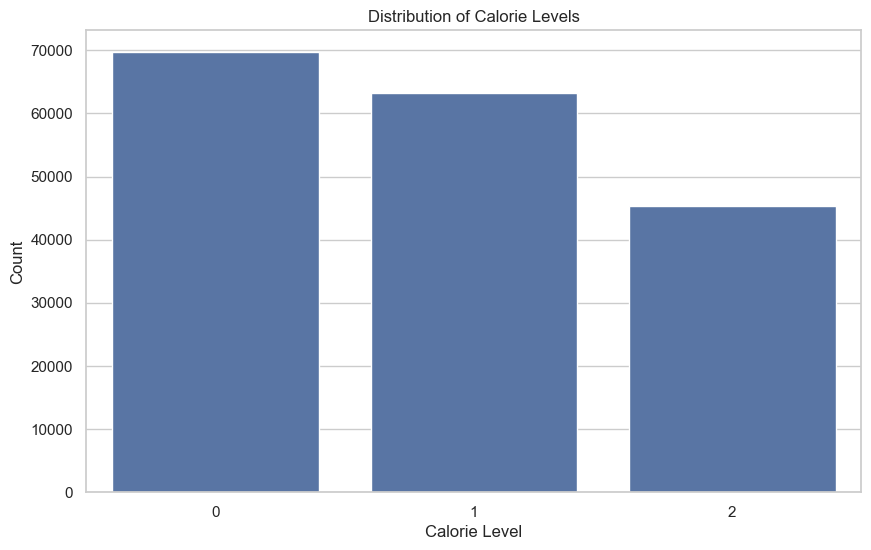


Calorie level distribution:
calorie_level
0    69699
1    63255
2    45311
Name: count, dtype: int64


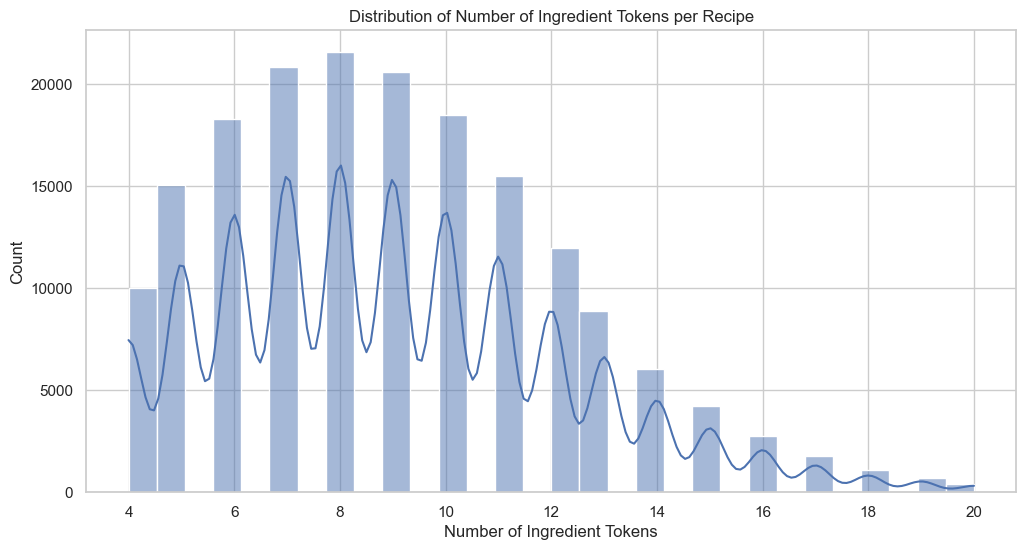


Ingredient count statistics:
Mean: 9.02 ingredients
Median: 9.00 ingredients
Min: 4 ingredients
Max: 20 ingredients


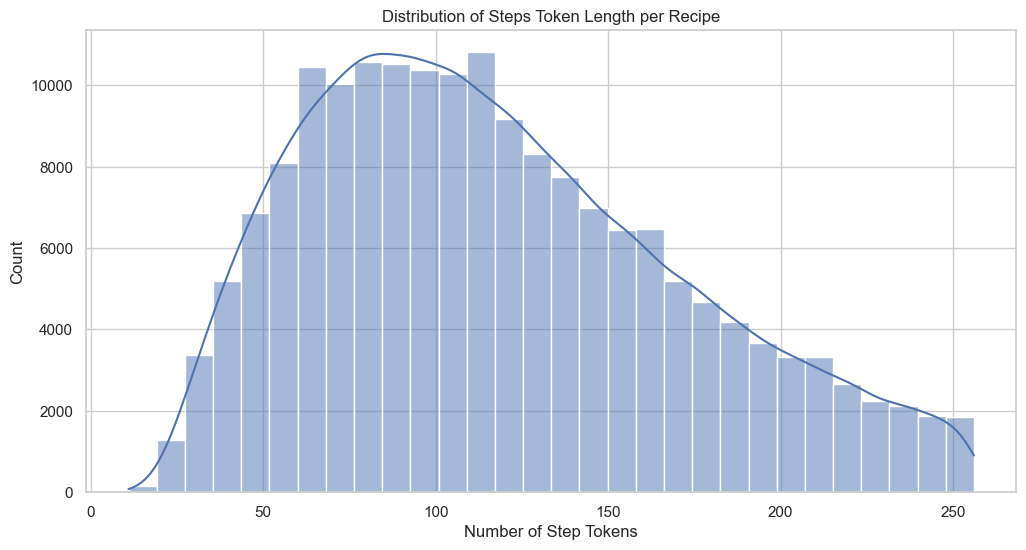


Step token count statistics:
Mean: 117.86 tokens
Median: 110.00 tokens
Min: 11 tokens
Max: 256 tokens


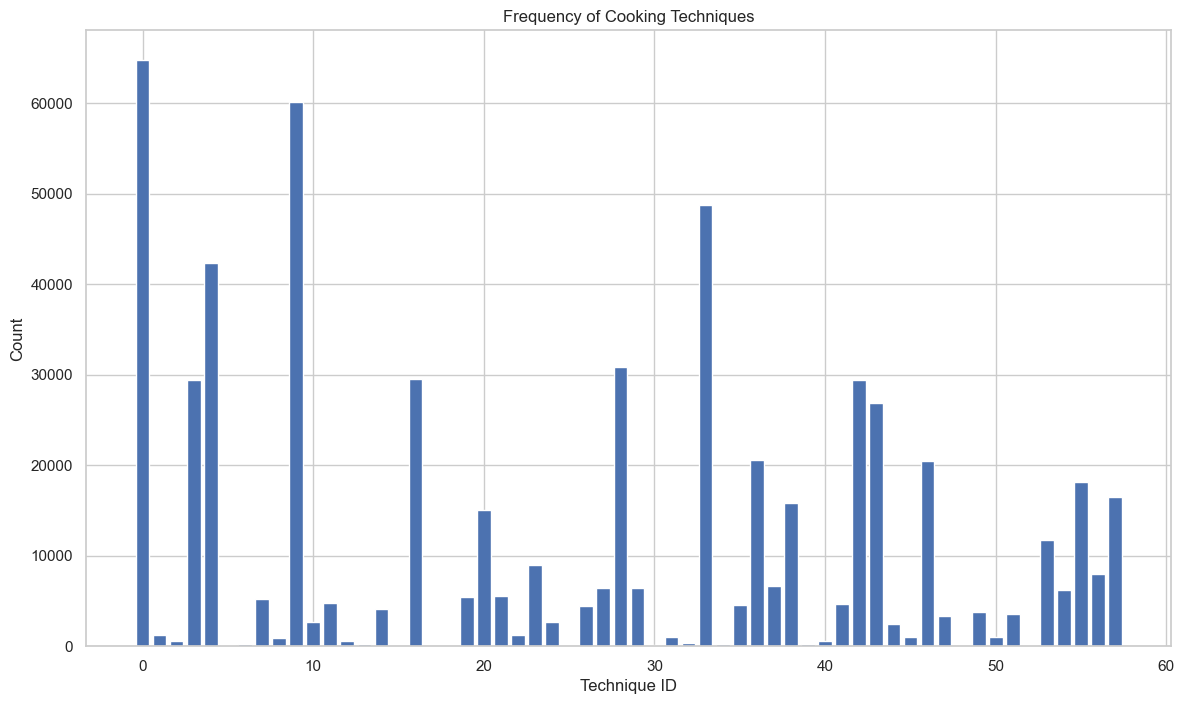


Top 5 most common techniques (by ID):
1. Technique ID 0: 64821 recipes
2. Technique ID 9: 60136 recipes
3. Technique ID 33: 48747 recipes
4. Technique ID 4: 42354 recipes
5. Technique ID 28: 30865 recipes


In [ ]:
# Examine preprocessed recipes data
if 'recipes_df' in dfs:
    # Display dataset shape and column names
    print(f"PP_recipes dataset shape: {recipes_df.shape}")
    print(f"Columns: {recipes_df.columns.tolist()}")
    
    # Convert string representations of lists to actual lists where needed
    list_columns = ['name_tokens', 'ingredient_tokens', 'steps_tokens', 'techniques', 'ingredient_ids']
    
    for col in list_columns:
        if col in recipes_df.columns and recipes_df[col].dtype == 'object':
            try:
                # Sample to check if it's a string representation of a list
                sample = recipes_df[col].dropna().iloc[0]
                if isinstance(sample, str) and (sample.startswith('[') or sample.startswith('{')):
                    print(f"Converting {col} from string to list/dict...")
                    recipes_df[col] = recipes_df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
            except (IndexError, ValueError) as e:
                print(f"Error converting {col}: {e}")
    
    # Analyze calorie level distribution
    if 'calorie_level' in recipes_df.columns:
        plt.figure(figsize=(10, 6))
        value_counts = recipes_df['calorie_level'].value_counts().sort_index()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title('Distribution of Calorie Levels')
        plt.xlabel('Calorie Level')
        plt.ylabel('Count')
        plt.show()
        
        print(f"\nCalorie level distribution:")
        print(value_counts)
    
    # Analyze ingredient token counts
    if 'ingredient_tokens' in recipes_df.columns:
        # Calculate number of ingredients per recipe
        recipes_df['ingredient_count'] = recipes_df['ingredient_tokens'].apply(lambda x: len(x) if isinstance(x, list) else 0)
        
        # Plot distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(recipes_df['ingredient_count'], bins=30, kde=True)
        plt.title('Distribution of Number of Ingredient Tokens per Recipe')
        plt.xlabel('Number of Ingredient Tokens')
        plt.ylabel('Count')
        plt.show()
        
        print("\nIngredient count statistics:")
        print(f"Mean: {recipes_df['ingredient_count'].mean():.2f} ingredients")
        print(f"Median: {recipes_df['ingredient_count'].median():.2f} ingredients")
        print(f"Min: {recipes_df['ingredient_count'].min()} ingredients")
        print(f"Max: {recipes_df['ingredient_count'].max()} ingredients")
    
    # Analyze recipe step token counts
    if 'steps_tokens' in recipes_df.columns:
        # Calculate number of steps per recipe
        recipes_df['step_token_count'] = recipes_df['steps_tokens'].apply(lambda x: len(x) if isinstance(x, list) else 0)
        
        # Plot distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(recipes_df['step_token_count'], bins=30, kde=True)
        plt.title('Distribution of Steps Token Length per Recipe')
        plt.xlabel('Number of Step Tokens')
        plt.ylabel('Count')
        plt.show()
        
        print("\nStep token count statistics:")
        print(f"Mean: {recipes_df['step_token_count'].mean():.2f} tokens")
        print(f"Median: {recipes_df['step_token_count'].median():.2f} tokens")
        print(f"Min: {recipes_df['step_token_count'].min()} tokens")
        print(f"Max: {recipes_df['step_token_count'].max()} tokens")
    
    # Analyze technique distribution
    if 'techniques' in recipes_df.columns:
        # If techniques are stored as a list of binary values
        try:
            # Get the first row to determine format
            first_row = recipes_df['techniques'].iloc[0]
            
            if isinstance(first_row, list):
                # Convert list of techniques to DataFrame
                techniques_array = np.array(recipes_df['techniques'].tolist())
                
                # Sum each technique across all recipes
                technique_counts = techniques_array.sum(axis=0)
                
                # Plot top techniques
                plt.figure(figsize=(14, 8))
                plt.bar(range(len(technique_counts)), technique_counts)
                plt.title('Frequency of Cooking Techniques')
                plt.xlabel('Technique ID')
                plt.ylabel('Count')
                plt.show()
                
                # Display the top 5 most common techniques
                top_techniques = np.argsort(technique_counts)[::-1][:5]
                print("\nTop 5 most common techniques (by ID):")
                for i, technique_id in enumerate(top_techniques):
                    print(f"{i+1}. Technique ID {technique_id}: {technique_counts[technique_id]} recipes")
        except Exception as e:
            print(f"Error analyzing techniques: {e}")

## 4. Raw Recipes Analysis

Analyzing the raw recipes dataset for additional insights

RAW_recipes dataset shape: (231637, 12)
Columns: ['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients']
Converting nutrition from string to list/dict...
Converting tags from string to list/dict...
Converting ingredients from string to list/dict...
Converting steps from string to list/dict...


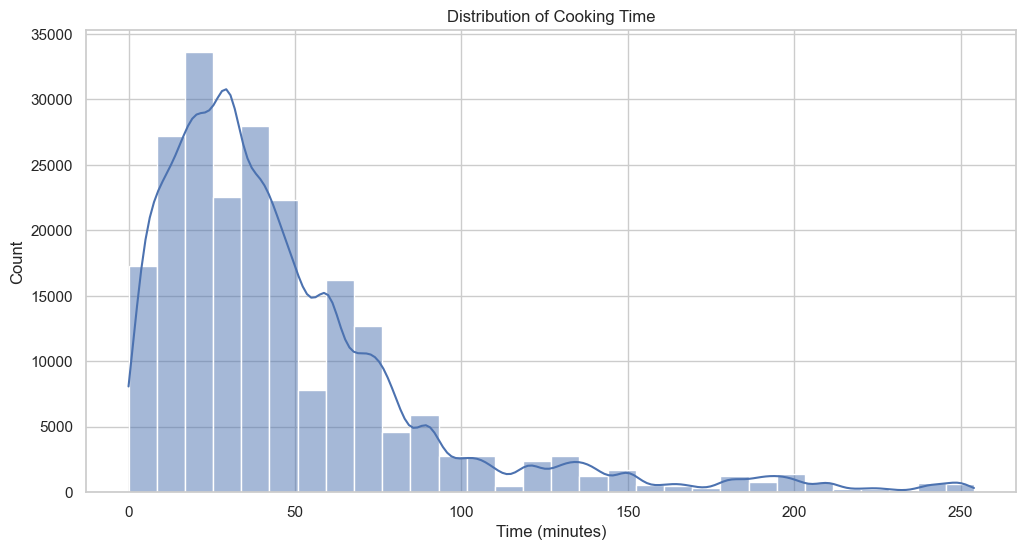


Cooking time statistics:
Mean: 9398.55 minutes
Median: 40.00 minutes
Min: 0 minutes
Max: 2147483647 minutes


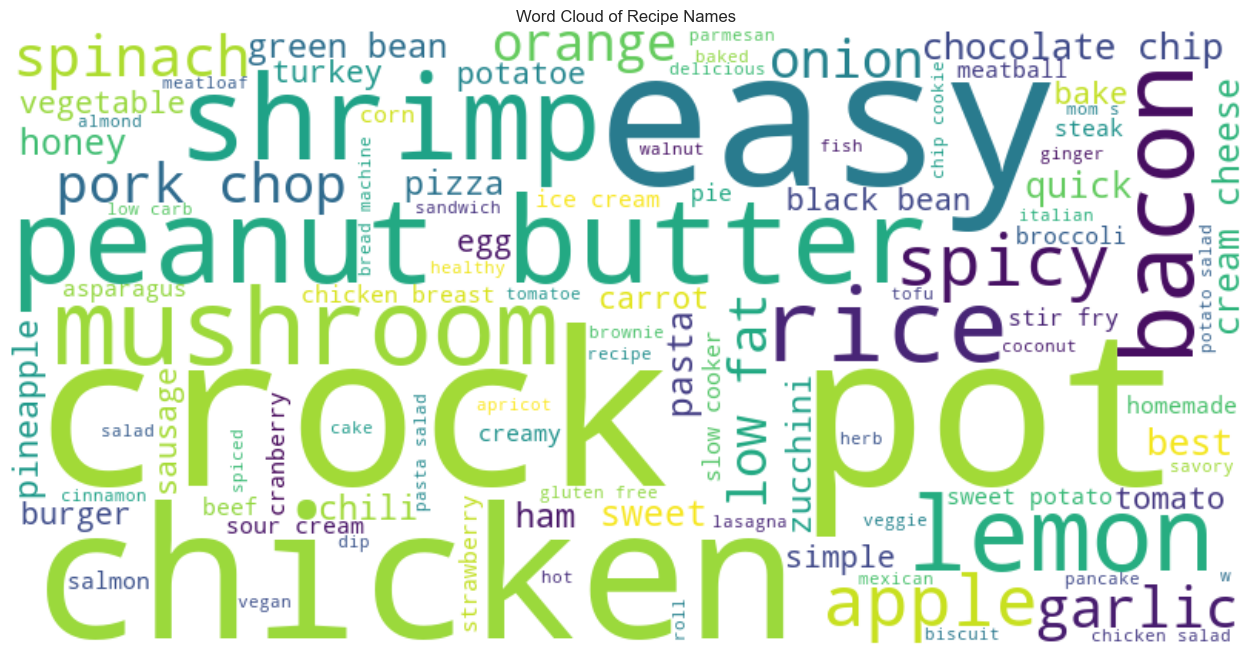

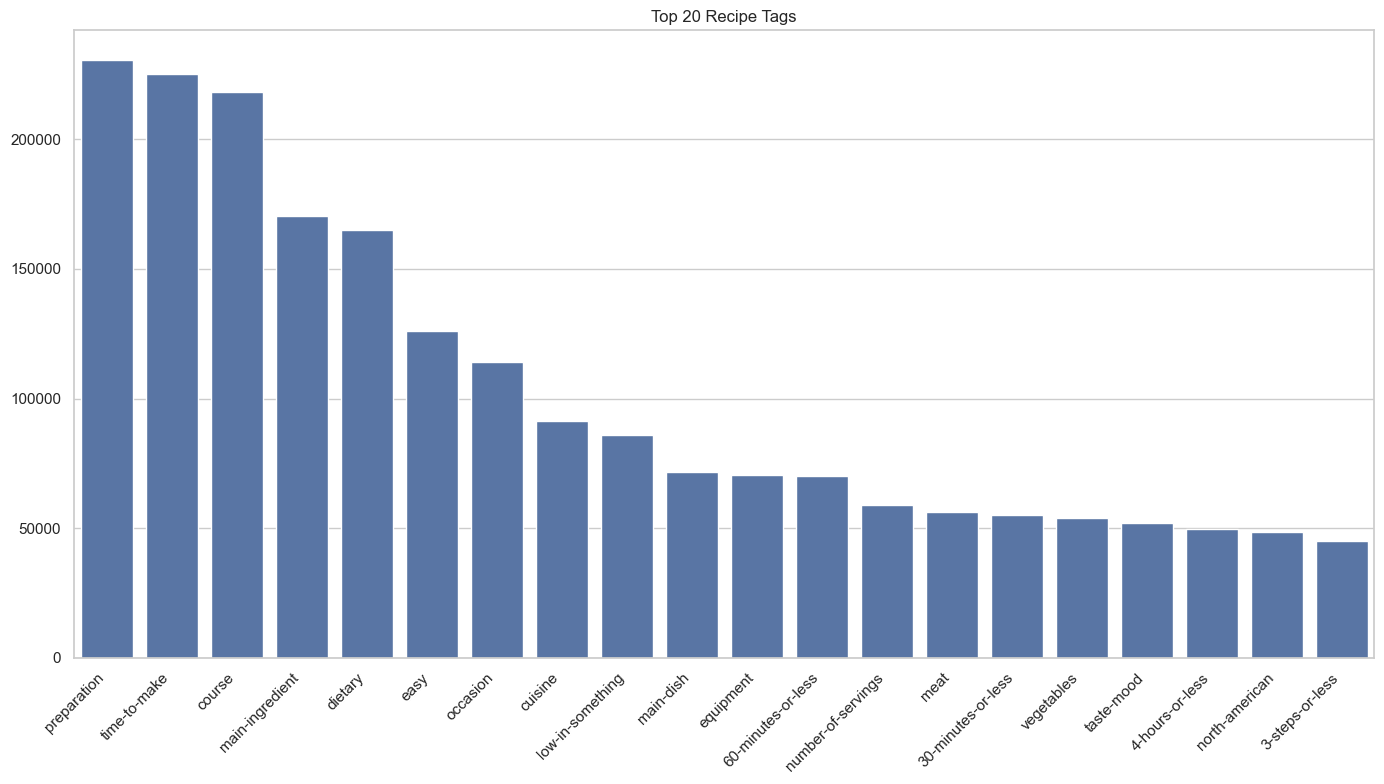

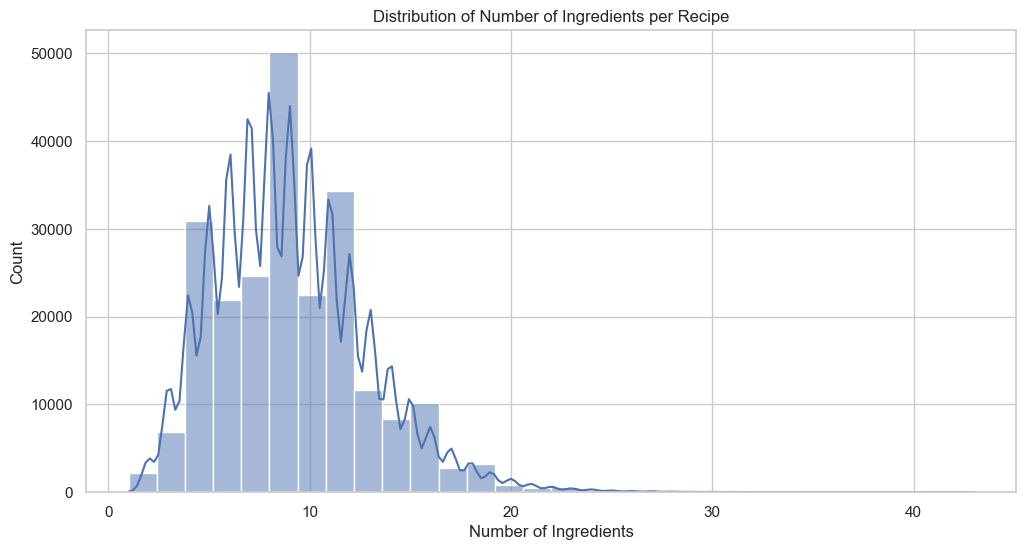


Ingredient count statistics:
Mean: 9.05 ingredients
Median: 9.00 ingredients
Min: 1 ingredients
Max: 43 ingredients


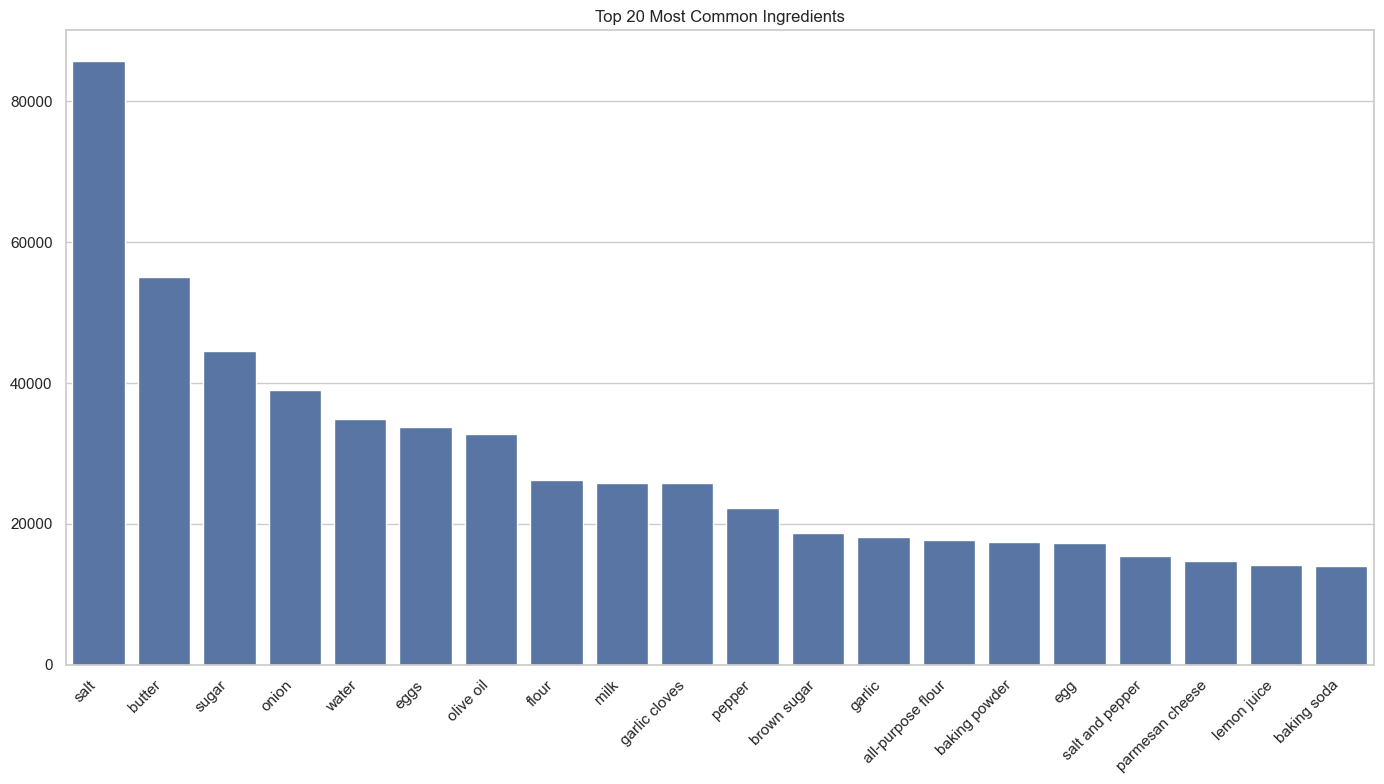

Nutrition sample: [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]


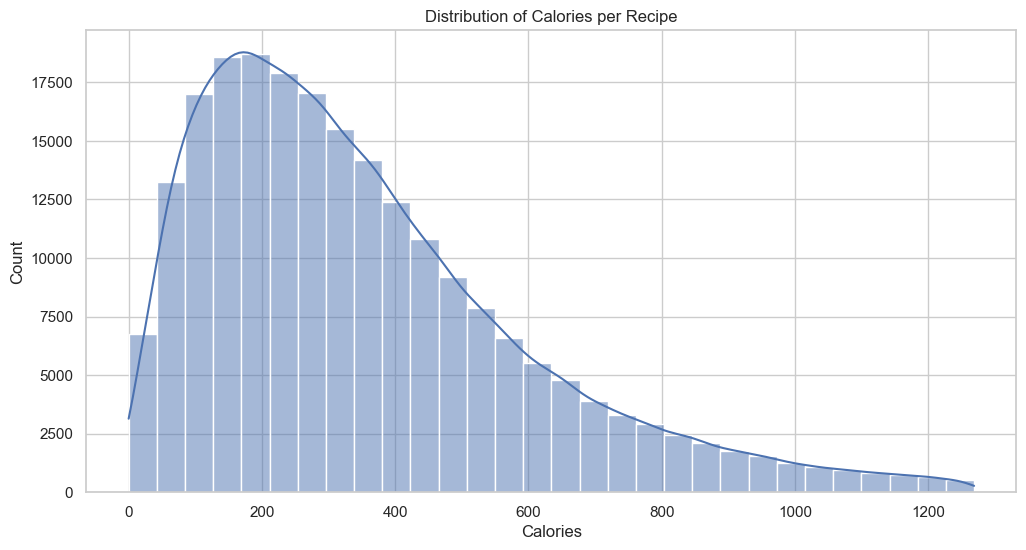

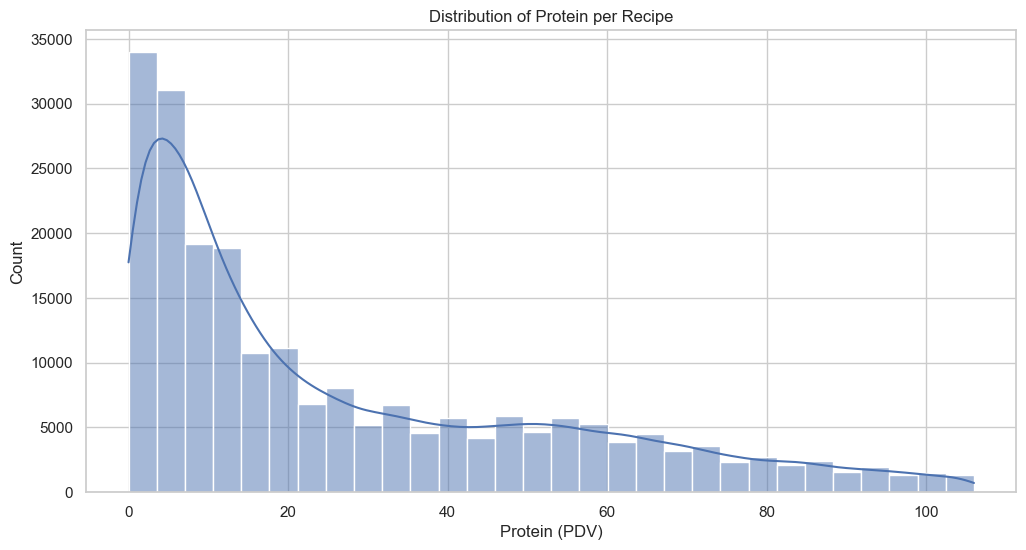

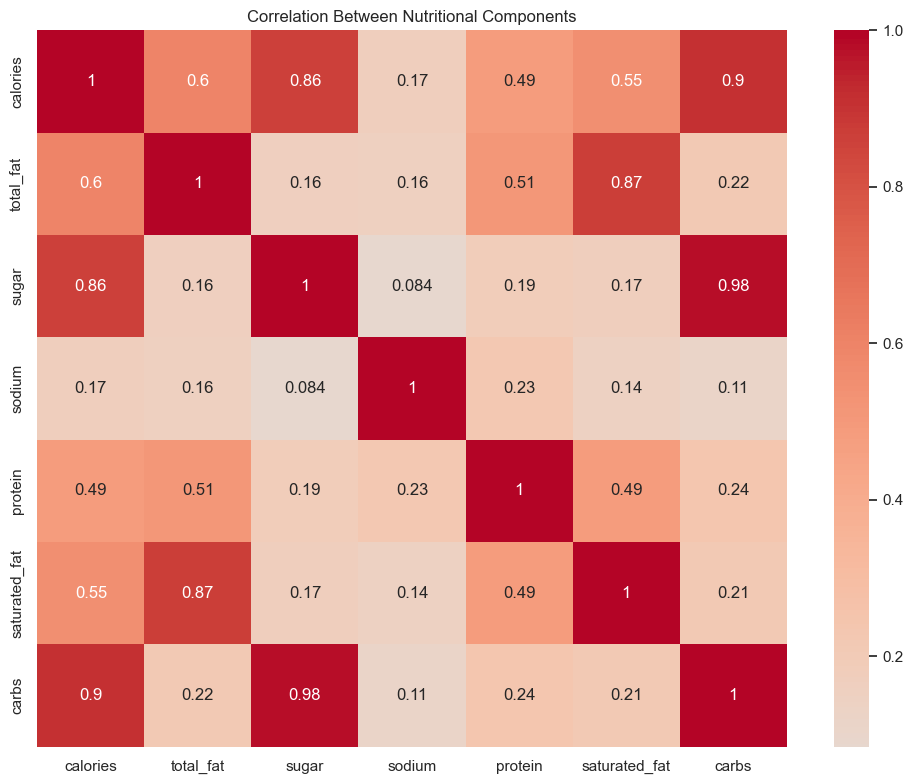

In [ ]:
# Analyze raw recipes if available
if 'raw_recipes_df' in dfs:
    # Display dataset shape and column names 
    print(f"RAW_recipes dataset shape: {raw_recipes_df.shape}")
    print(f"Columns: {raw_recipes_df.columns.tolist()}")
    
    # Convert string representations of lists to actual lists where needed
    list_columns = ['nutrition', 'tags', 'ingredients', 'steps']
    
    for col in list_columns:
        if col in raw_recipes_df.columns and raw_recipes_df[col].dtype == 'object':
            try:
                # Sample to check if it's a string representation of a list
                sample = raw_recipes_df[col].dropna().iloc[0]
                if isinstance(sample, str) and (sample.startswith('[') or sample.startswith('{')):
                    print(f"Converting {col} from string to list/dict...")
                    raw_recipes_df[col] = raw_recipes_df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
            except (IndexError, ValueError) as e:
                print(f"Error converting {col}: {e}")
    
    # Analyze cooking time distributions
    if 'minutes' in raw_recipes_df.columns:
        # Filter out extreme values for better visualization
        filtered_times = raw_recipes_df[raw_recipes_df['minutes'] < raw_recipes_df['minutes'].quantile(0.95)]['minutes']
        
        plt.figure(figsize=(12, 6))
        sns.histplot(filtered_times, bins=30, kde=True)
        plt.title('Distribution of Cooking Time')
        plt.xlabel('Time (minutes)')
        plt.ylabel('Count')
        plt.show()
        
        print(f"\nCooking time statistics:")
        print(f"Mean: {raw_recipes_df['minutes'].mean():.2f} minutes")
        print(f"Median: {raw_recipes_df['minutes'].median():.2f} minutes")
        print(f"Min: {raw_recipes_df['minutes'].min()} minutes")
        print(f"Max: {raw_recipes_df['minutes'].max()} minutes")
    
    # Analyze recipe names with word cloud
    if 'name' in raw_recipes_df.columns:
        # Combine all recipe names
        all_names = ' '.join(raw_recipes_df['name'].dropna().astype(str))
        
        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', 
                             max_words=100, contour_width=3, contour_color='steelblue').generate(all_names)
        
        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Recipe Names')
        plt.show()
    
    # Check for recipe tags
    if 'tags' in raw_recipes_df.columns:
        # Flatten list of tags
        all_tags = []
        for tags in raw_recipes_df['tags'].dropna():
            if isinstance(tags, list):
                all_tags.extend(tags)
        
        # Get top tags
        top_tags = Counter(all_tags).most_common(20)
        
        # Plot top tags
        plt.figure(figsize=(14, 8))
        sns.barplot(x=[tag for tag, count in top_tags], y=[count for tag, count in top_tags])
        plt.title('Top 20 Recipe Tags')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Analyze ingredients
    if 'ingredients' in raw_recipes_df.columns:
        # Calculate number of ingredients per recipe
        raw_recipes_df['ingredient_count'] = raw_recipes_df['ingredients'].apply(lambda x: len(x) if isinstance(x, list) else 0)
        
        # Plot distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(raw_recipes_df['ingredient_count'], bins=30, kde=True)
        plt.title('Distribution of Number of Ingredients per Recipe')
        plt.xlabel('Number of Ingredients')
        plt.ylabel('Count')
        plt.show()
        
        print("\nIngredient count statistics:")
        print(f"Mean: {raw_recipes_df['ingredient_count'].mean():.2f} ingredients")
        print(f"Median: {raw_recipes_df['ingredient_count'].median():.2f} ingredients")
        print(f"Min: {raw_recipes_df['ingredient_count'].min()} ingredients")
        print(f"Max: {raw_recipes_df['ingredient_count'].max()} ingredients")
        
        # Top ingredients
        all_ingredients = []
        for ingredients in raw_recipes_df['ingredients'].dropna():
            if isinstance(ingredients, list):
                all_ingredients.extend([ing.lower() for ing in ingredients])
        
        top_ingredients = Counter(all_ingredients).most_common(20)
        
        plt.figure(figsize=(14, 8))
        sns.barplot(x=[ing for ing, count in top_ingredients], y=[count for ing, count in top_ingredients])
        plt.title('Top 20 Most Common Ingredients')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Extract and analyze nutritional information
    if 'nutrition' in raw_recipes_df.columns:
        # Check nutritional information structure
        nutrition_sample = raw_recipes_df['nutrition'].dropna().iloc[0]
        print(f"Nutrition sample: {nutrition_sample}")
        
        # If nutrition is a list or can be converted to one
        if isinstance(nutrition_sample, list):
            nutrition_components = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbs']
            
            for i, component in enumerate(nutrition_components):
                raw_recipes_df[component] = raw_recipes_df['nutrition'].apply(lambda x: x[i] if isinstance(x, list) and len(x) > i else None)
            
            # Plot distribution of calories (filtered to remove outliers for better visualization)
            plt.figure(figsize=(12, 6))
            filtered_calories = raw_recipes_df[raw_recipes_df['calories'] < raw_recipes_df['calories'].quantile(0.95)]['calories']
            sns.histplot(filtered_calories, bins=30, kde=True)
            plt.title('Distribution of Calories per Recipe')
            plt.xlabel('Calories')
            plt.ylabel('Count')
            plt.show()
            
            # Plot distribution of protein
            plt.figure(figsize=(12, 6))
            filtered_protein = raw_recipes_df[raw_recipes_df['protein'] < raw_recipes_df['protein'].quantile(0.95)]['protein']
            sns.histplot(filtered_protein, bins=30, kde=True)
            plt.title('Distribution of Protein per Recipe')
            plt.xlabel('Protein (PDV)')
            plt.ylabel('Count')
            plt.show()
            
            # Create a correlation matrix of nutritional components
            plt.figure(figsize=(10, 8))
            sns.heatmap(raw_recipes_df[nutrition_components].corr(), annot=True, cmap='coolwarm', center=0)
            plt.title('Correlation Between Nutritional Components')
            plt.tight_layout()
            plt.show()

## 5. Interactions Analysis

Understanding user interactions with recipes


===== Analysis of interactions_train_df =====


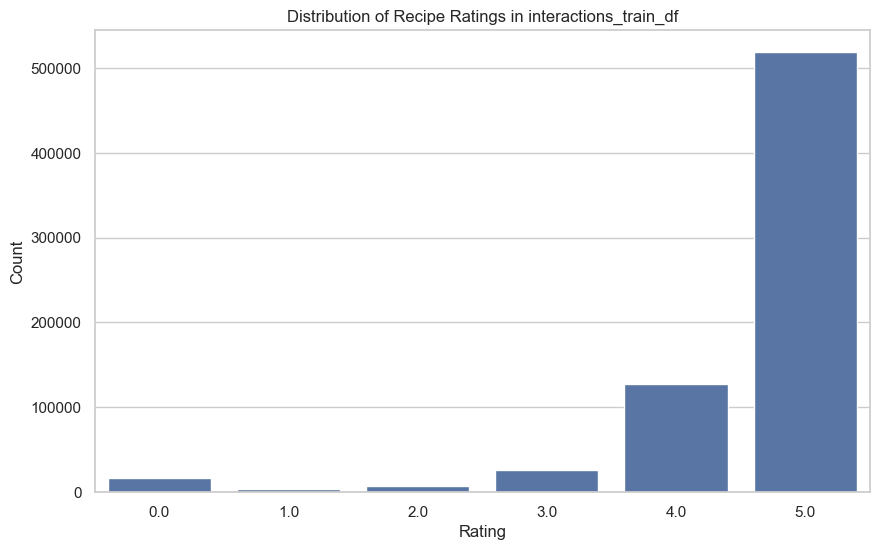

Average recipe rating: 4.57

Rating distribution:
Rating 0.0: 16957 (2.43%)
Rating 1.0: 3341 (0.48%)
Rating 2.0: 6852 (0.98%)
Rating 3.0: 25781 (3.69%)
Rating 4.0: 127402 (18.23%)
Rating 5.0: 518568 (74.20%)

Recipe popularity statistics:
Total unique recipes: 160901
Average ratings per recipe: 4.34
Median ratings per recipe: 2.00
Maximum ratings for a single recipe: 1091

Top 10 most rated recipes:
Recipe ID: 27208, Name: to die for crock pot roast, Ratings: 1091
Recipe ID: 89204, Name: crock pot chicken with black beans   cream cheese, Ratings: 1075
Recipe ID: 32204, Name: whatever floats your boat  brownies, Ratings: 897
Recipe ID: 39087, Name: creamy cajun chicken pasta, Ratings: 894
Recipe ID: 69173, Name: kittencal s italian melt in your mouth meatballs, Ratings: 787
Recipe ID: 54257, Name: yes  virginia there is a great meatloaf, Ratings: 758
Recipe ID: 22782, Name: jo mama s world famous spaghetti, Ratings: 738
Recipe ID: 68955, Name: japanese mum s chicken, Ratings: 681
Recipe

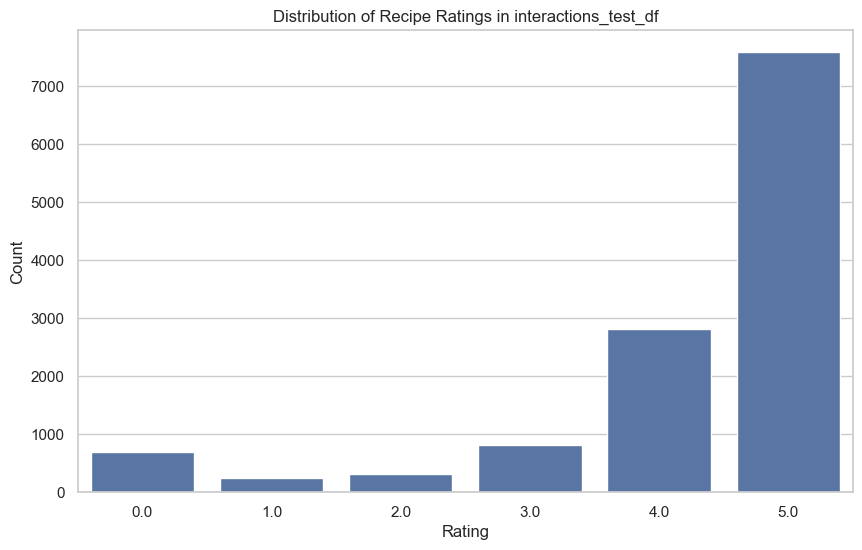

Average recipe rating: 4.21

Rating distribution:
Rating 0.0: 687 (5.52%)
Rating 1.0: 249 (2.00%)
Rating 2.0: 311 (2.50%)
Rating 3.0: 815 (6.54%)
Rating 4.0: 2807 (22.54%)
Rating 5.0: 7586 (60.91%)

Recipe popularity statistics:
Total unique recipes: 11695
Average ratings per recipe: 1.06
Median ratings per recipe: 1.00
Maximum ratings for a single recipe: 4

Top 10 most rated recipes:
Recipe ID: 304052, Name: clone of a cinnabon, Ratings: 4
Recipe ID: 272207, Name: christmas bark candy, Ratings: 4
Recipe ID: 4170, Name: favorite pumpkin pie, Ratings: 4
Recipe ID: 33067, Name: three chocolate fudge, Ratings: 4
Recipe ID: 42283, Name: dixie crossroads corn fritters, Ratings: 4
Recipe ID: 99406, Name: swiss green bean casserole, Ratings: 4
Recipe ID: 21825, Name: cheesy potato corn soup, Ratings: 4
Recipe ID: 232395, Name: brownies  weight watchers  2 points, Ratings: 3
Recipe ID: 112720, Name: mediterranean herb baked chicken, Ratings: 3
Recipe ID: 444556, Name: best baked corn   dean k

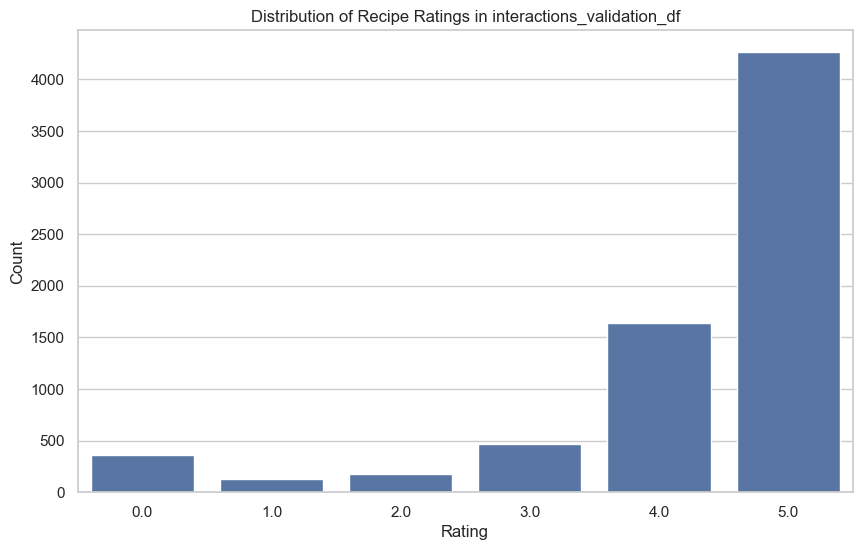

Average recipe rating: 4.23

Rating distribution:
Rating 0.0: 356 (5.07%)
Rating 1.0: 132 (1.88%)
Rating 2.0: 173 (2.46%)
Rating 3.0: 462 (6.58%)
Rating 4.0: 1637 (23.31%)
Rating 5.0: 4263 (60.70%)

Recipe popularity statistics:
Total unique recipes: 6621
Average ratings per recipe: 1.06
Median ratings per recipe: 1.00
Maximum ratings for a single recipe: 4

Top 10 most rated recipes:
Recipe ID: 121037, Name: chocolate chip treasure cookies, Ratings: 4
Recipe ID: 83928, Name: shortcut bearnaise sauce, Ratings: 4
Recipe ID: 128705, Name: good times and noodle salad  pasta salad, Ratings: 4
Recipe ID: 258425, Name: rice flour crepes   pancakes  gluten  dairy and egg free, Ratings: 4
Recipe ID: 5414, Name: southerner s specialty eggnog, Ratings: 4
Recipe ID: 148006, Name: disneyland s mint julep  non alcoholic, Ratings: 3
Recipe ID: 329725, Name: chorizo and egg breakfast burritos   oamc, Ratings: 3
Recipe ID: 73693, Name: pecan pie jelly, Ratings: 3
Recipe ID: 142702, Name: boursin chick

In [ ]:
# Analyze interactions data
for interactions_df_name in ['interactions_train_df', 'interactions_test_df', 'interactions_validation_df']:
    if interactions_df_name in dfs:
        interactions_df = dfs[interactions_df_name]
        print(f"\n===== Analysis of {interactions_df_name} =====")
        
        # Distribution of ratings
        if 'rating' in interactions_df.columns:
            plt.figure(figsize=(10, 6))
            sns.countplot(x='rating', data=interactions_df)
            plt.title(f'Distribution of Recipe Ratings in {interactions_df_name}')
            plt.xlabel('Rating')
            plt.ylabel('Count')
            plt.show()
            
            # Calculate average rating
            avg_rating = interactions_df['rating'].mean()
            print(f"Average recipe rating: {avg_rating:.2f}")
            
            # Rating distribution
            rating_counts = interactions_df['rating'].value_counts().sort_index()
            print("\nRating distribution:")
            for rating, count in rating_counts.items():
                percentage = (count / len(interactions_df)) * 100
                print(f"Rating {rating}: {count} ({percentage:.2f}%)")

        # Analyze recipe popularity - number of ratings per recipe
        if 'recipe_id' in interactions_df.columns:
            recipe_counts = interactions_df['recipe_id'].value_counts()
            
            print(f"\nRecipe popularity statistics:")
            print(f"Total unique recipes: {len(recipe_counts)}")
            print(f"Average ratings per recipe: {recipe_counts.mean():.2f}")
            print(f"Median ratings per recipe: {recipe_counts.median():.2f}")
            print(f"Maximum ratings for a single recipe: {recipe_counts.max()}")
            
            # Get top 10 most rated recipes
            top_recipes = recipe_counts.nlargest(10)
            print("\nTop 10 most rated recipes:")
            for recipe_id, count in top_recipes.items():
                recipe_name = "Unknown"
                if 'raw_recipes_df' in dfs and 'name' in raw_recipes_df.columns and 'id' in raw_recipes_df.columns:
                    recipe_info = raw_recipes_df[raw_recipes_df['id'] == recipe_id]
                    if not recipe_info.empty:
                        recipe_name = recipe_info['name'].values[0]
                print(f"Recipe ID: {recipe_id}, Name: {recipe_name}, Ratings: {count}")

## 6. Text Analysis of Reviews

Analyzing the content of recipe reviews

Total reviews: 1132198
Reviews with content: 1132195


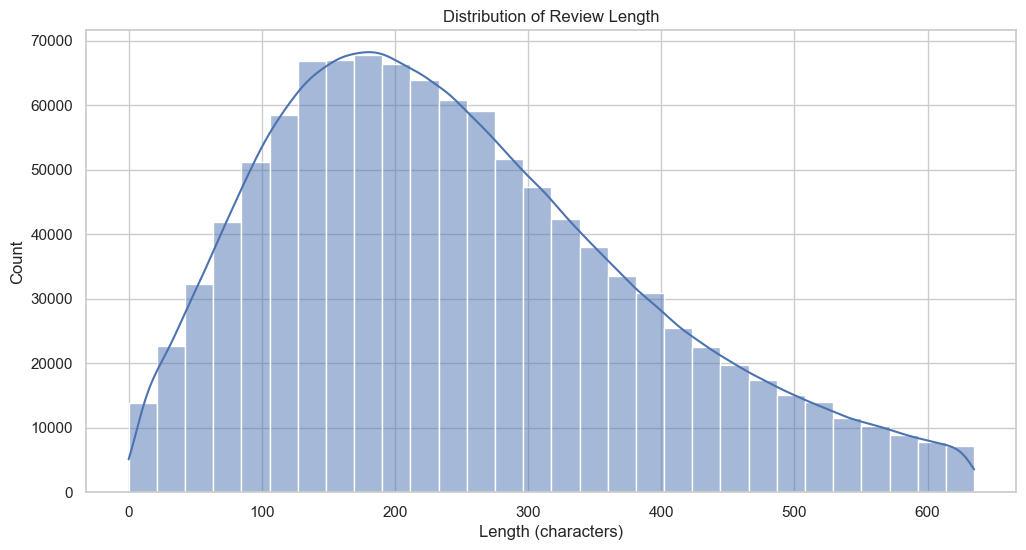


Review length statistics:
Mean review length: 278.40 characters
Median review length: 237.00 characters
Max review length: 8587 characters


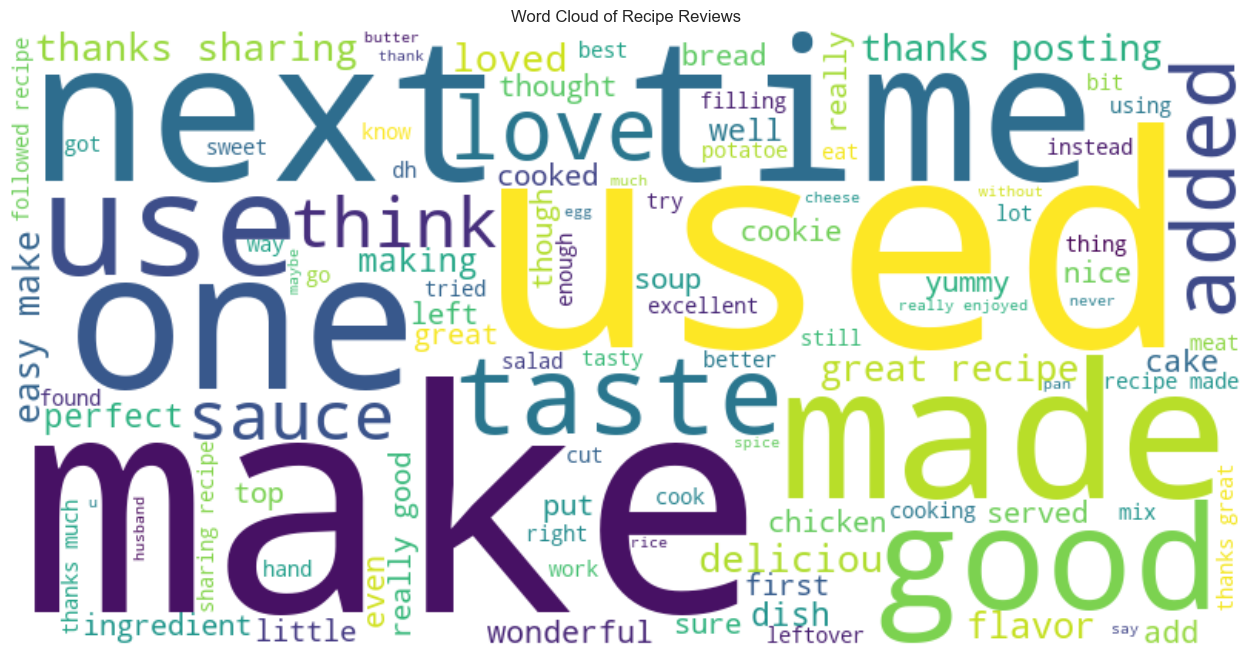

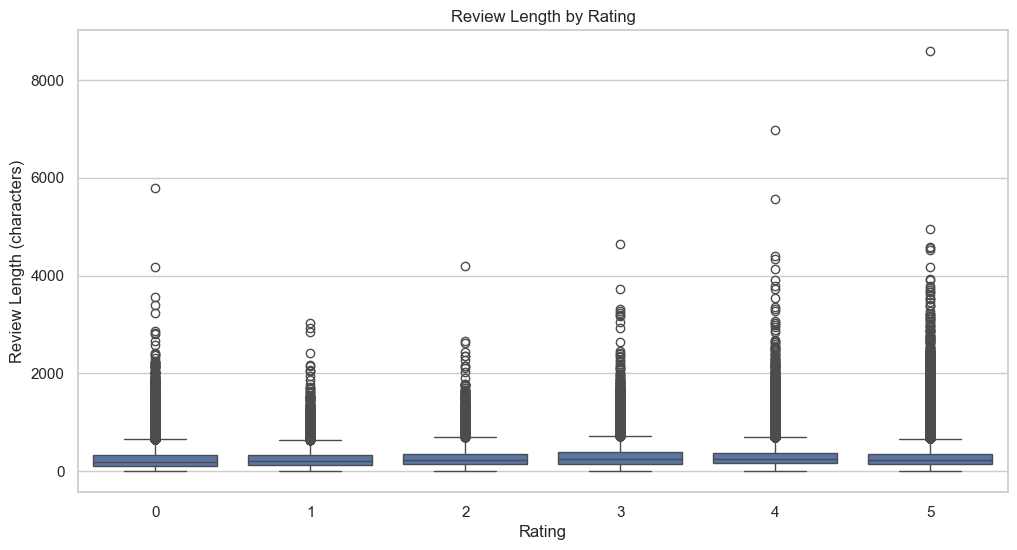


Average review length by rating:
Rating 0: 250.69 characters
Rating 1: 253.47 characters
Rating 2: 280.38 characters
Rating 3: 300.58 characters
Rating 4: 290.91 characters
Rating 5: 276.84 characters


In [ ]:
# Analyze review text if available
if 'raw_interactions_df' in dfs and 'review' in raw_interactions_df.columns:
    # Filter out missing reviews
    reviews = raw_interactions_df['review'].dropna()
    
    print(f"Total reviews: {len(reviews)}")
    print(f"Reviews with content: {len(reviews[reviews.str.strip() != ''])}")
    
    # Calculate review length distribution
    raw_interactions_df['review_length'] = raw_interactions_df['review'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
    
    plt.figure(figsize=(12, 6))
    # Filter out extremely long reviews for better visualization
    filtered_lengths = raw_interactions_df[raw_interactions_df['review_length'] < raw_interactions_df['review_length'].quantile(0.95)]['review_length']
    sns.histplot(filtered_lengths, bins=30, kde=True)
    plt.title('Distribution of Review Length')
    plt.xlabel('Length (characters)')
    plt.ylabel('Count')
    plt.show()
    
    print("\nReview length statistics:")
    print(f"Mean review length: {raw_interactions_df['review_length'].mean():.2f} characters")
    print(f"Median review length: {raw_interactions_df['review_length'].median():.2f} characters")
    print(f"Max review length: {raw_interactions_df['review_length'].max()} characters")
    
    # Word cloud of reviews
    # Sample a smaller subset for faster processing
    sample_size = min(50000, len(reviews))
    sampled_reviews = reviews.sample(sample_size, random_state=42)
    
    # Combine all reviews
    all_reviews = ' '.join(sampled_reviews.astype(str))
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = all_reviews.lower().split()
    words = [word for word in words if word not in stop_words and len(word) > 1]
    filtered_reviews = ' '.join(words)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         max_words=100, contour_width=3, contour_color='steelblue').generate(filtered_reviews)
    
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Recipe Reviews')
    plt.show()
    
    # Analyze relationship between review length and rating
    if 'rating' in raw_interactions_df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='rating', y='review_length', data=raw_interactions_df[raw_interactions_df['review_length'] > 0])
        plt.title('Review Length by Rating')
        plt.xlabel('Rating')
        plt.ylabel('Review Length (characters)')
        plt.show()
        
        # Calculate average review length by rating
        avg_length_by_rating = raw_interactions_df.groupby('rating')['review_length'].mean()
        print("\nAverage review length by rating:")
        for rating, avg_length in avg_length_by_rating.items():
            print(f"Rating {rating}: {avg_length:.2f} characters")

## 7. User Analysis

Analyzing user behavior and preferences

Total number of users: 25076
Columns: ['u', 'techniques', 'items', 'n_items', 'ratings', 'n_ratings']
Converting techniques from string to list/dict...
Converting items from string to list/dict...
Converting ratings from string to list/dict...


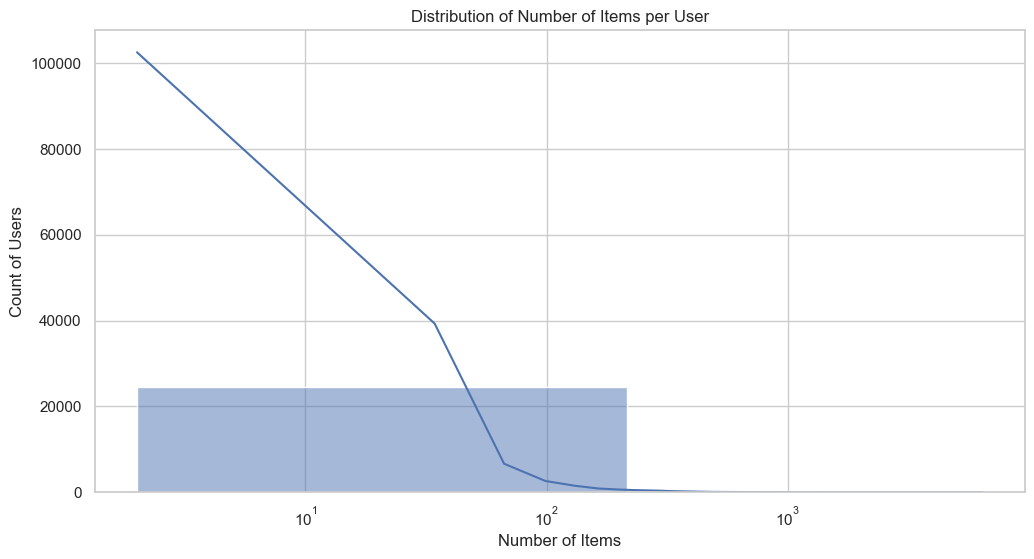

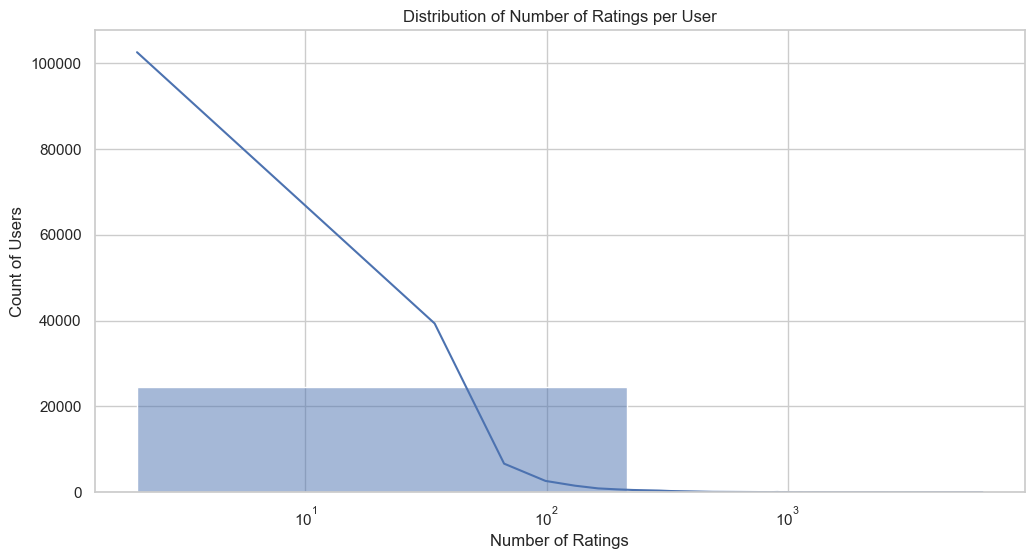


User activity statistics:
Average items per user: 27.87
Median items per user: 6.00
Maximum items for a single user: 6437
Average ratings per user: 27.87
Median ratings per user: 6.00
Maximum ratings for a single user: 6437


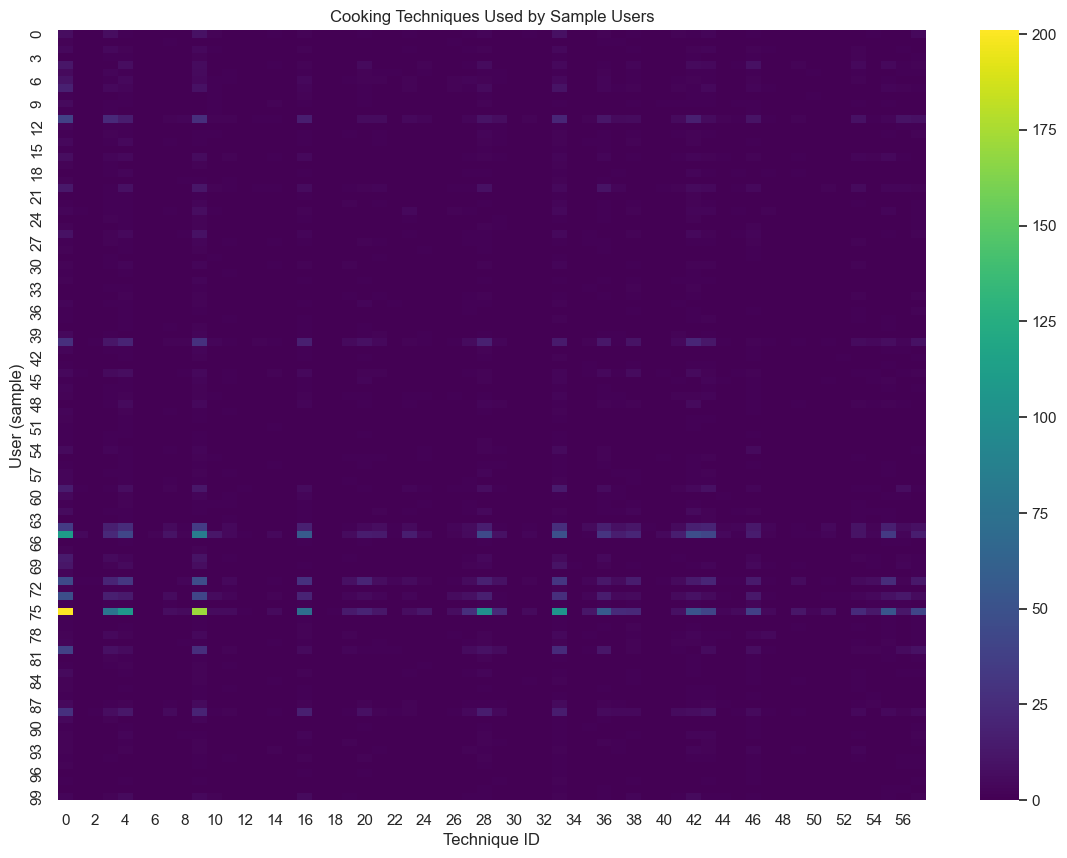

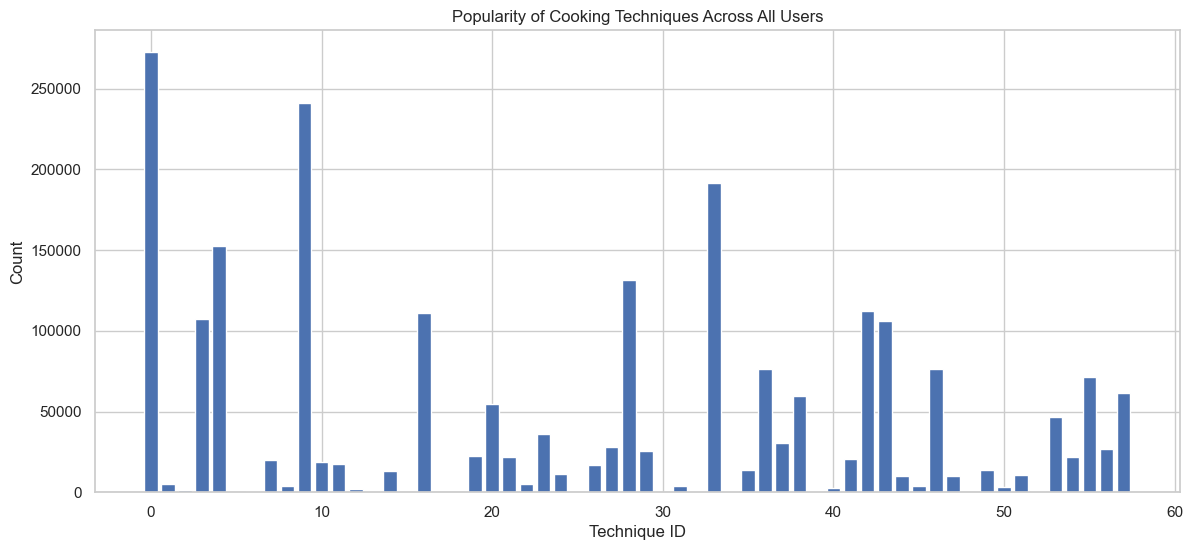


Top 5 most popular cooking techniques (by ID):
1. Technique ID 0: 272491 users
2. Technique ID 9: 240771 users
3. Technique ID 33: 191690 users
4. Technique ID 4: 152244 users
5. Technique ID 28: 131569 users


In [ ]:
# Analyze users_df if available
if 'users_df' in dfs:
    print(f"Total number of users: {len(users_df)}")
    print(f"Columns: {users_df.columns.tolist()}")
    
    # Convert string representations of lists to actual lists where needed
    list_columns = ['techniques', 'items', 'ratings']
    
    for col in list_columns:
        if col in users_df.columns and users_df[col].dtype == 'object':
            try:
                # Sample to check if it's a string representation of a list
                sample = users_df[col].dropna().iloc[0]
                if isinstance(sample, str) and (sample.startswith('[') or sample.startswith('{')):
                    print(f"Converting {col} from string to list/dict...")
                    users_df[col] = users_df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
            except (IndexError, ValueError) as e:
                print(f"Error converting {col}: {e}")
    
    # Analyze number of items and ratings per user
    if 'n_items' in users_df.columns and 'n_ratings' in users_df.columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(users_df['n_items'], bins=30, kde=True)
        plt.title('Distribution of Number of Items per User')
        plt.xlabel('Number of Items')
        plt.ylabel('Count of Users')
        plt.xscale('log')  # Log scale for better visualization
        plt.show()
        
        plt.figure(figsize=(12, 6))
        sns.histplot(users_df['n_ratings'], bins=30, kde=True)
        plt.title('Distribution of Number of Ratings per User')
        plt.xlabel('Number of Ratings')
        plt.ylabel('Count of Users')
        plt.xscale('log')  # Log scale for better visualization
        plt.show()
        
        print("\nUser activity statistics:")
        print(f"Average items per user: {users_df['n_items'].mean():.2f}")
        print(f"Median items per user: {users_df['n_items'].median():.2f}")
        print(f"Maximum items for a single user: {users_df['n_items'].max()}")
        print(f"Average ratings per user: {users_df['n_ratings'].mean():.2f}")
        print(f"Median ratings per user: {users_df['n_ratings'].median():.2f}")
        print(f"Maximum ratings for a single user: {users_df['n_ratings'].max()}")
    
    # Analyze user techniques
    if 'techniques' in users_df.columns:
        try:
            # Get a random sample of users for visualization
            sample_size = min(100, len(users_df))
            user_sample = users_df.sample(sample_size, random_state=42)
            
            # Create a heatmap of techniques for the sample
            techniques_array = np.array(user_sample['techniques'].tolist())
            
            plt.figure(figsize=(14, 10))
            sns.heatmap(techniques_array, cmap='viridis')
            plt.title('Cooking Techniques Used by Sample Users')
            plt.xlabel('Technique ID')
            plt.ylabel('User (sample)')
            plt.show()
            
            # Sum each technique across all users
            techniques_array_all = np.array(users_df['techniques'].tolist())
            technique_totals = techniques_array_all.sum(axis=0)
            
            # Plot the distribution of techniques
            plt.figure(figsize=(14, 6))
            plt.bar(range(len(technique_totals)), technique_totals)
            plt.title('Popularity of Cooking Techniques Across All Users')
            plt.xlabel('Technique ID')
            plt.ylabel('Count')
            plt.show()
            
            # Display top 5 most popular techniques
            top_techniques = np.argsort(technique_totals)[::-1][:5]
            print("\nTop 5 most popular cooking techniques (by ID):")
            for i, technique_id in enumerate(top_techniques):
                print(f"{i+1}. Technique ID {technique_id}: {technique_totals[technique_id]} users")
        except Exception as e:
            print(f"Error analyzing user techniques: {e}")

## 8. Combining Datasets for Advanced Analysis

Joining datasets to uncover more complex patterns

Number of recipes with ratings: 160901
Number of recipes with at least 5 ratings: 34348


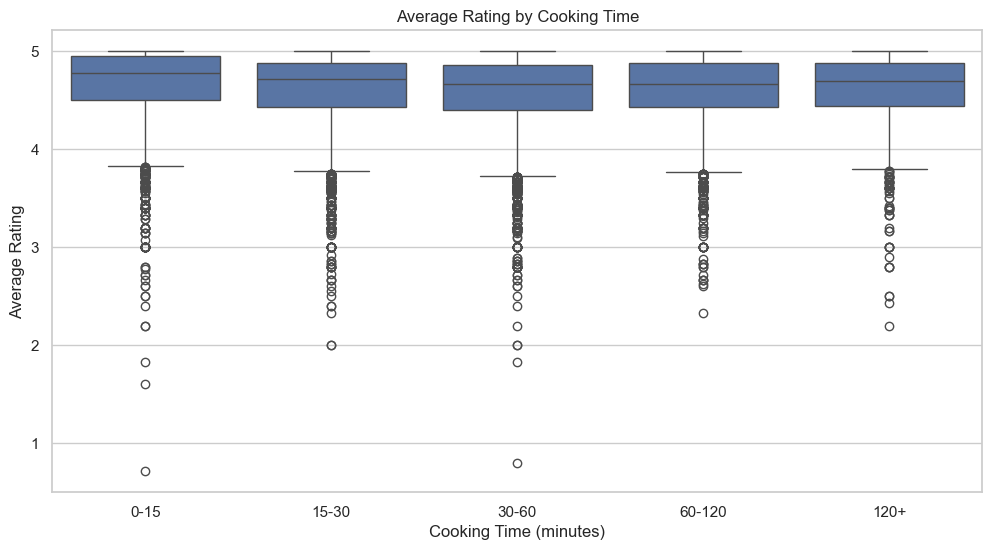


Average rating by cooking time:
0-15 minutes: 4.66 (n=6093)
15-30 minutes: 4.62 (n=9183)
30-60 minutes: 4.60 (n=10688)
60-120 minutes: 4.61 (n=4870)
120+ minutes: 4.62 (n=1633)


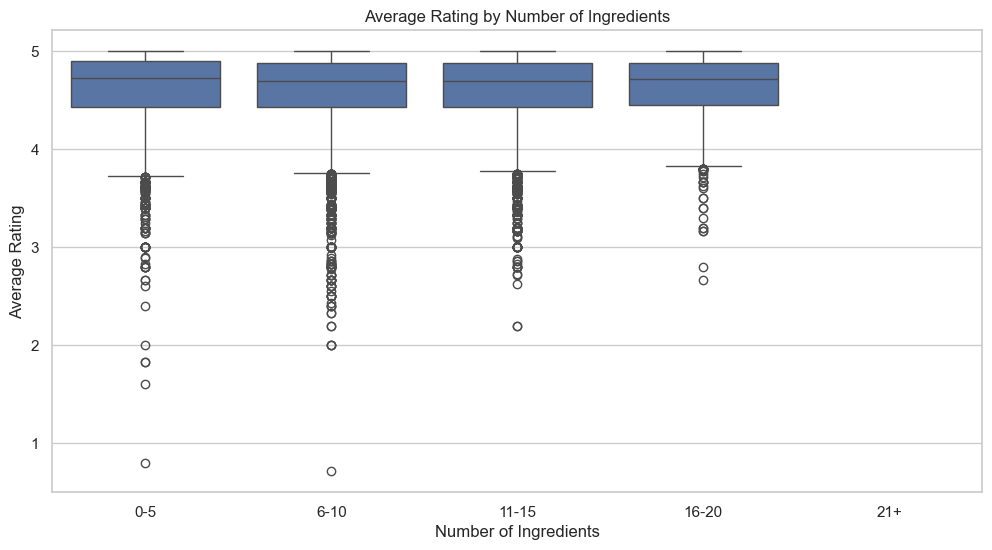


Average rating by ingredient count:
0-5 ingredients: 4.62 (n=4944)
6-10 ingredients: 4.62 (n=18688)
11-15 ingredients: 4.61 (n=7922)
16-20 ingredients: 4.63 (n=1057)
21+ ingredients: nan (n=0)


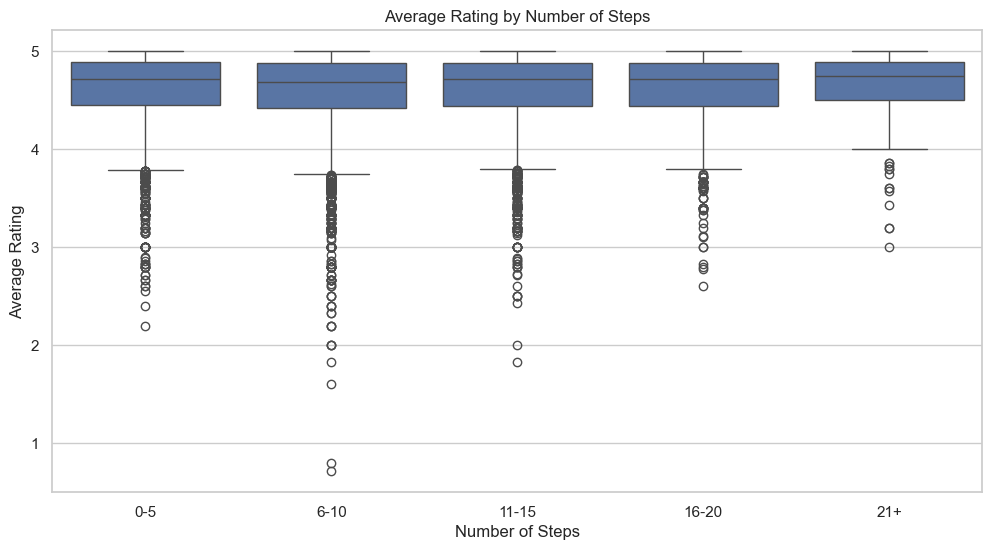


Average rating by step count:
0-5 steps: 4.63 (n=7222)
6-10 steps: 4.61 (n=15964)
11-15 steps: 4.62 (n=7532)
16-20 steps: 4.62 (n=1669)
21+ steps: 4.63 (n=224)


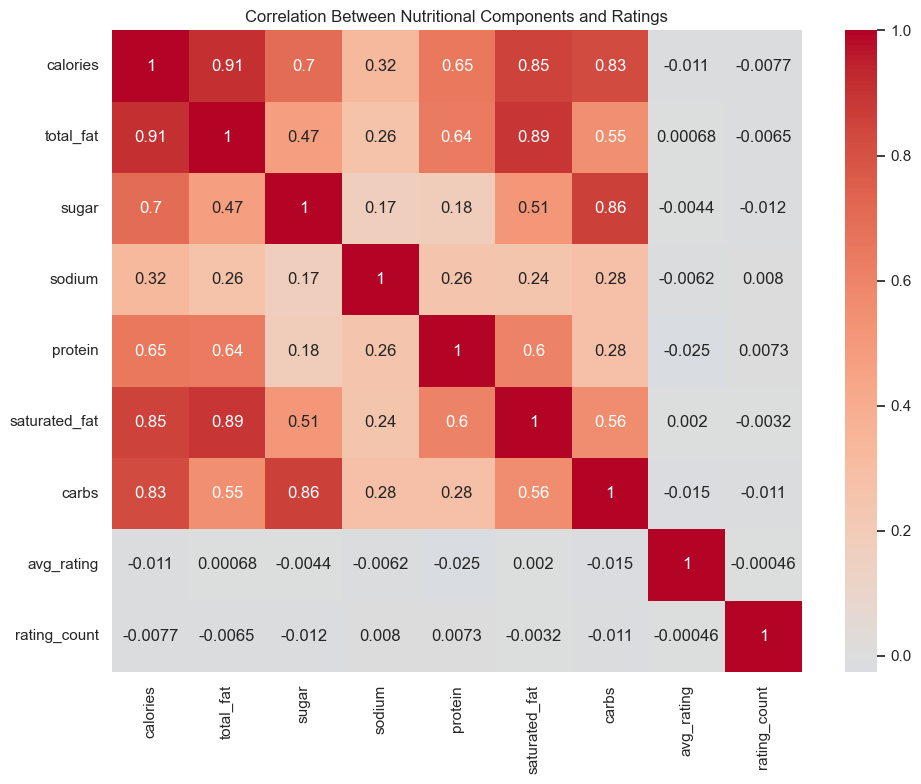

In [ ]:
# Join raw recipes with interactions to analyze recipe attributes and their ratings
if 'raw_recipes_df' in dfs and 'interactions_train_df' in dfs:
    # Ensure we have the necessary ID columns for joining
    if 'id' in raw_recipes_df.columns and 'recipe_id' in interactions_train_df.columns:
        # Calculate average rating per recipe
        avg_ratings = interactions_train_df.groupby('recipe_id')['rating'].agg(['mean', 'count']).reset_index()
        avg_ratings.columns = ['recipe_id', 'avg_rating', 'rating_count']
        
        # Merge with recipes data
        recipe_ratings = pd.merge(raw_recipes_df, avg_ratings, left_on='id', right_on='recipe_id', how='inner')
        
        print(f"Number of recipes with ratings: {len(recipe_ratings)}")
        
        # Filter to recipes with a minimum number of ratings for more reliable analysis
        min_ratings = 5
        recipe_ratings_filtered = recipe_ratings[recipe_ratings['rating_count'] >= min_ratings]
        print(f"Number of recipes with at least {min_ratings} ratings: {len(recipe_ratings_filtered)}")
        
        # Analyze relationship between cooking time and rating
        if 'minutes' in recipe_ratings_filtered.columns:
            # Remove extreme outliers in cooking time
            recipe_ratings_filtered = recipe_ratings_filtered[recipe_ratings_filtered['minutes'] < recipe_ratings_filtered['minutes'].quantile(0.95)]
            
            # Bin cooking times
            bins = [0, 15, 30, 60, 120, float('inf')]
            labels = ['0-15', '15-30', '30-60', '60-120', '120+']
            recipe_ratings_filtered['time_category'] = pd.cut(recipe_ratings_filtered['minutes'], bins=bins, labels=labels)
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='time_category', y='avg_rating', data=recipe_ratings_filtered)
            plt.title('Average Rating by Cooking Time')
            plt.xlabel('Cooking Time (minutes)')
            plt.ylabel('Average Rating')
            plt.show()
            
            # Calculate average rating by time category
            time_ratings = recipe_ratings_filtered.groupby('time_category')['avg_rating'].mean()
            print("\nAverage rating by cooking time:")
            for time_cat, avg_rating in time_ratings.items():
                count = recipe_ratings_filtered[recipe_ratings_filtered['time_category'] == time_cat].shape[0]
                print(f"{time_cat} minutes: {avg_rating:.2f} (n={count})")
        
        # Analyze relationship between number of ingredients and rating
        if 'n_ingredients' in recipe_ratings_filtered.columns:
            # Bin ingredient counts
            bins = [0, 5, 10, 15, 20, float('inf')]
            labels = ['0-5', '6-10', '11-15', '16-20', '21+']
            recipe_ratings_filtered['ingredient_category'] = pd.cut(recipe_ratings_filtered['n_ingredients'], bins=bins, labels=labels)
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='ingredient_category', y='avg_rating', data=recipe_ratings_filtered)
            plt.title('Average Rating by Number of Ingredients')
            plt.xlabel('Number of Ingredients')
            plt.ylabel('Average Rating')
            plt.show()
            
            # Calculate average rating by ingredient category
            ing_ratings = recipe_ratings_filtered.groupby('ingredient_category')['avg_rating'].mean()
            print("\nAverage rating by ingredient count:")
            for ing_cat, avg_rating in ing_ratings.items():
                count = recipe_ratings_filtered[recipe_ratings_filtered['ingredient_category'] == ing_cat].shape[0]
                print(f"{ing_cat} ingredients: {avg_rating:.2f} (n={count})")
        
        # Analyze relationship between number of steps and rating
        if 'n_steps' in recipe_ratings_filtered.columns:
            # Bin step counts
            bins = [0, 5, 10, 15, 20, float('inf')]
            labels = ['0-5', '6-10', '11-15', '16-20', '21+']
            recipe_ratings_filtered['step_category'] = pd.cut(recipe_ratings_filtered['n_steps'], bins=bins, labels=labels)
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='step_category', y='avg_rating', data=recipe_ratings_filtered)
            plt.title('Average Rating by Number of Steps')
            plt.xlabel('Number of Steps')
            plt.ylabel('Average Rating')
            plt.show()
            
            # Calculate average rating by step category
            step_ratings = recipe_ratings_filtered.groupby('step_category')['avg_rating'].mean()
            print("\nAverage rating by step count:")
            for step_cat, avg_rating in step_ratings.items():
                count = recipe_ratings_filtered[recipe_ratings_filtered['step_category'] == step_cat].shape[0]
                print(f"{step_cat} steps: {avg_rating:.2f} (n={count})")
        
        # If we have nutritional information, analyze its relationship with ratings
        nutrition_components = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbs']
        if all(component in recipe_ratings_filtered.columns for component in nutrition_components):
            # Create correlation matrix
            corr_columns = nutrition_components + ['avg_rating', 'rating_count']
            corr_matrix = recipe_ratings_filtered[corr_columns].corr()
            
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
            plt.title('Correlation Between Nutritional Components and Ratings')
            plt.tight_layout()
            plt.show()

## 9. Text Analysis of Raw Recipes

Analyzing recipe descriptions, steps, and ingredients

Number of recipes with descriptions: 226658 (97.85%)


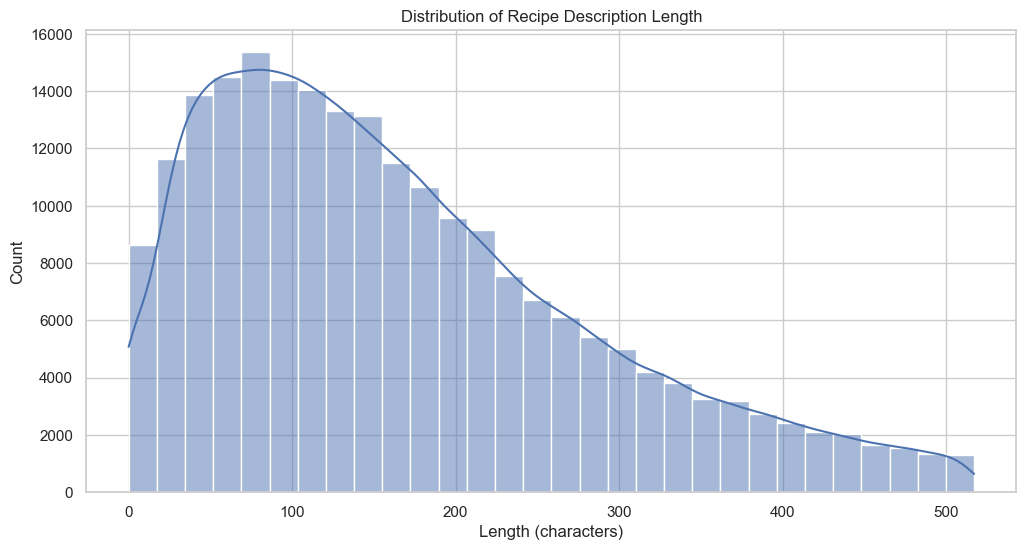


Description length statistics:
Mean: 195.65 characters
Median: 151.00 characters
Max: 6369 characters


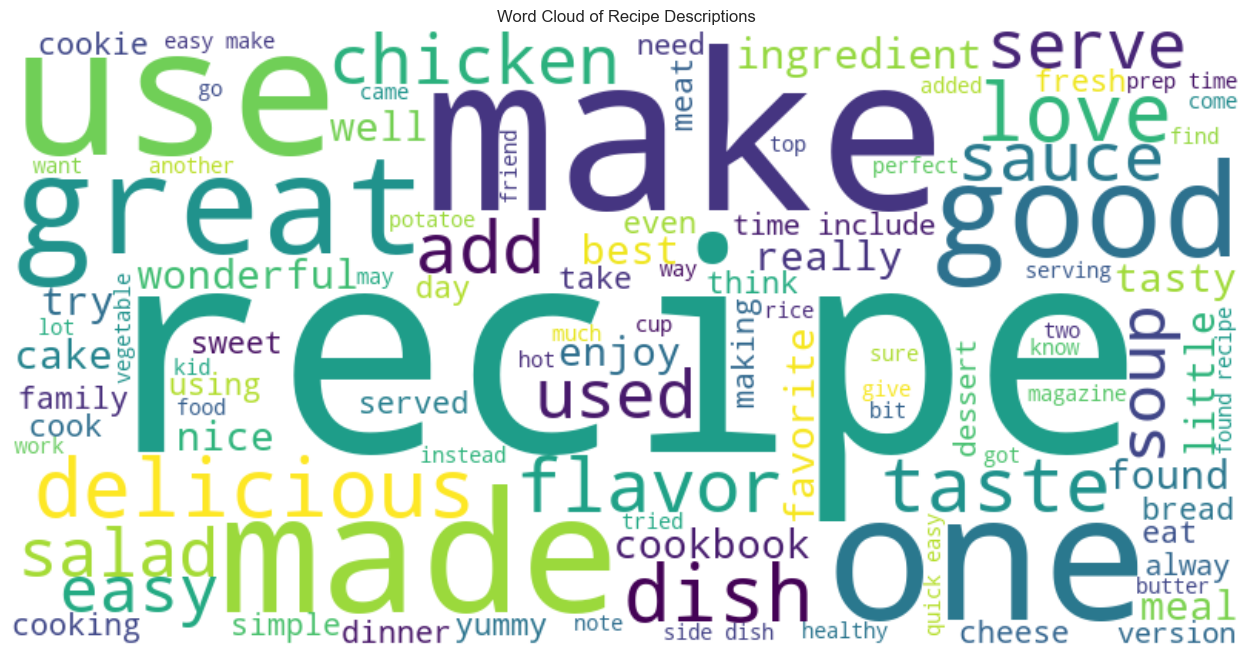


Top terms per topic in recipe descriptions:
Topic 1: recipe, use, make, sauce, chicken, like, just, add, cheese, soup
Topic 2: fat, recipe, chocolate, low, sugar, cake, sweet, cookie, cookies, use
Topic 3: recipe, time, make, good, got, family, tried, years, recipes, favorite
Topic 4: dish, easy, recipe, great, salad, delicious, chicken, com, simple, quick
Topic 5: light, recipe, great, cream, dessert, breakfast, pie, easy, bread, summer

Sample recipes from each topic:

Topic 1 examples:
- this is one of the best soups i've ever made and it is even worthy of company.  so simple, yet rich in deep, mushroomy flavor.  the inspiration was zaar #26877, a delicious mushroom rice casserole.  i...
- this comes from a pam anderson recipe. i love creamy pastas like alfredos, etc... but don't like all the fat. this recipe is a great solution. by using 2 percent evaporated milk, instead of heavy crea...
- this is a little more work than the normal way i make salmon -- with lemon and old bay unde

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Analyze recipe descriptions if available
if 'raw_recipes_df' in dfs and 'description' in raw_recipes_df.columns:
    # Filter out missing descriptions
    descriptions = raw_recipes_df['description'].dropna()
    
    print(f"Number of recipes with descriptions: {len(descriptions)} ({(len(descriptions)/len(raw_recipes_df))*100:.2f}%)")
    
    # Calculate description length
    raw_recipes_df['description_length'] = raw_recipes_df['description'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
    
    # Plot distribution of description length
    plt.figure(figsize=(12, 6))
    filtered_lengths = raw_recipes_df[raw_recipes_df['description_length'] < raw_recipes_df['description_length'].quantile(0.95)]['description_length']
    sns.histplot(filtered_lengths, bins=30, kde=True)
    plt.title('Distribution of Recipe Description Length')
    plt.xlabel('Length (characters)')
    plt.ylabel('Count')
    plt.show()
    
    print("\nDescription length statistics:")
    print(f"Mean: {raw_recipes_df['description_length'].mean():.2f} characters")
    print(f"Median: {raw_recipes_df['description_length'].median():.2f} characters")
    print(f"Max: {raw_recipes_df['description_length'].max()} characters")
    
    # Word cloud of descriptions
    if len(descriptions) > 0:
        # Sample descriptions for faster processing if there are many
        sample_size = min(10000, len(descriptions))
        sampled_descriptions = descriptions.sample(sample_size, random_state=42)
        
        # Combine all descriptions
        all_descriptions = ' '.join(sampled_descriptions.astype(str))
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = all_descriptions.lower().split()
        words = [word for word in words if word not in stop_words and len(word) > 1]
        filtered_descriptions = ' '.join(words)
        
        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', 
                             max_words=100, contour_width=3, contour_color='steelblue').generate(filtered_descriptions)
        
        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Recipe Descriptions')
        plt.show()
    
    # Topic modeling on descriptions
    if len(descriptions) > 100:  # Ensure enough data for meaningful analysis
        # Sample for faster processing if needed
        sample_size = min(20000, len(descriptions))
        description_sample = descriptions.sample(sample_size, random_state=42)
        
        # Create TF-IDF features
        tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        tfidf_matrix = tfidf_vectorizer.fit_transform(description_sample)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        
        # Apply LDA for topic modeling
        n_topics = 5  # Number of topics to extract
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_output = lda.fit_transform(tfidf_matrix)
        
        # Display top terms for each topic
        print("\nTop terms per topic in recipe descriptions:")
        for topic_idx, topic in enumerate(lda.components_):
            top_words_idx = topic.argsort()[:-11:-1]  # Get indices of top 10 words
            top_words = [feature_names[i] for i in top_words_idx]
            print(f"Topic {topic_idx+1}: {', '.join(top_words)}")
        
        # Display sample descriptions for each topic
        print("\nSample recipes from each topic:")
        doc_topics = lda.transform(tfidf_matrix)
        
        for topic_idx in range(n_topics):
            # Get documents most associated with this topic
            topic_docs = doc_topics[:, topic_idx].argsort()[::-1][:3]  # Top 3 docs for this topic
            
            print(f"\nTopic {topic_idx+1} examples:")
            for doc_idx in topic_docs:
                desc = description_sample.iloc[doc_idx][:200] + "..." if len(description_sample.iloc[doc_idx]) > 200 else description_sample.iloc[doc_idx]
                print(f"- {desc}")